In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
file_path = 'Data List for Logistics Network Management of Livestock Waste for Spatiotemporal Control of Nutrient Pollution in Water Bodies.xlsx'
df = pd.read_excel(file_path, sheet_name='Supply Data')

In [7]:
df.columns = [col.strip().lower() for col in df.columns]

In [8]:
df.head()

,#supply,node,product,amount (kg/week),price ($/tonne),unnamed: 5,unnamed: 6,p1 - raw beef manure
0,s1,beef01,p1,16524.33044,0,NaN,NaN,p2 - raw cow manure
1,s2,beef02,p1,16524.33044,0,NaN,NaN,NaN
2,s3,beef03,p1,16524.33044,0,NaN,NaN,dilute ratio: 1.5 (1kg manure will be diluted ...
3,s4,beef04,p1,66097.32177,0,NaN,NaN,NaN
4,s5,beef05,p1,33048.66088,0,NaN,NaN,NaN


In [9]:
print(df['product'].dropna().unique())

['p1' 'p2' 'p3']


In [10]:
df['amount (kg/week)'] = pd.to_numeric(df['amount (kg/week)'], errors='coerce')
df = df.dropna(subset=['amount (kg/week)', 'product', 'node'])

In [11]:
product_summary = df.groupby('product')['amount (kg/week)'].sum().reset_index()

In [12]:
product_summary.head()

,product,amount (kg/week)
0,p1,2.776088e+06
1,p2,1.081347e+07
2,p3,3.479497e+06


C:\Users\Asus\AppData\Local\Temp\ipykernel_20496\3033115577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_summary, x='product', y='amount (kg/week)', palette='viridis')


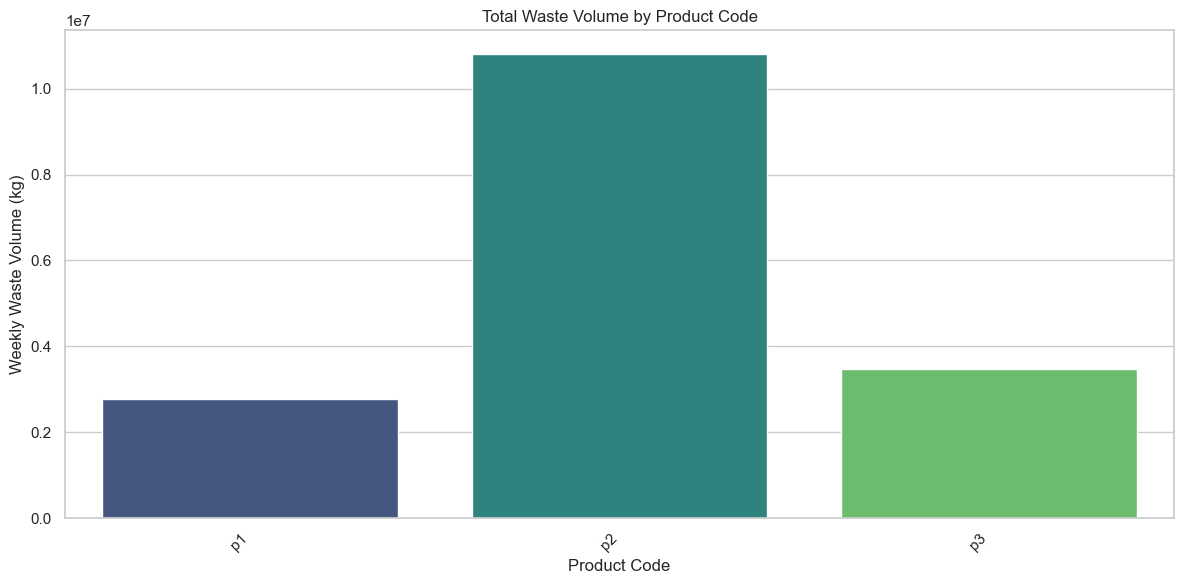

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_summary, x='product', y='amount (kg/week)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Waste Volume by Product Code')
plt.xlabel('Product Code')
plt.ylabel('Weekly Waste Volume (kg)')
plt.tight_layout()
plt.show()

In [14]:
location_summary = df.groupby('node')['amount (kg/week)'].sum().reset_index()

In [19]:
df_node = df.groupby('node')['amount (kg/week)'].sum().reset_index()

In [20]:
df_node.head()

,node,amount (kg/week)
0,beef01,16524.33044
1,beef02,16524.33044
2,beef03,16524.33044
3,beef04,66097.32177
4,beef05,33048.66088


C:\Users\Asus\AppData\Local\Temp\ipykernel_20496\3376252975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nodes, x="node", y="amount (kg/week)", palette="Set3")


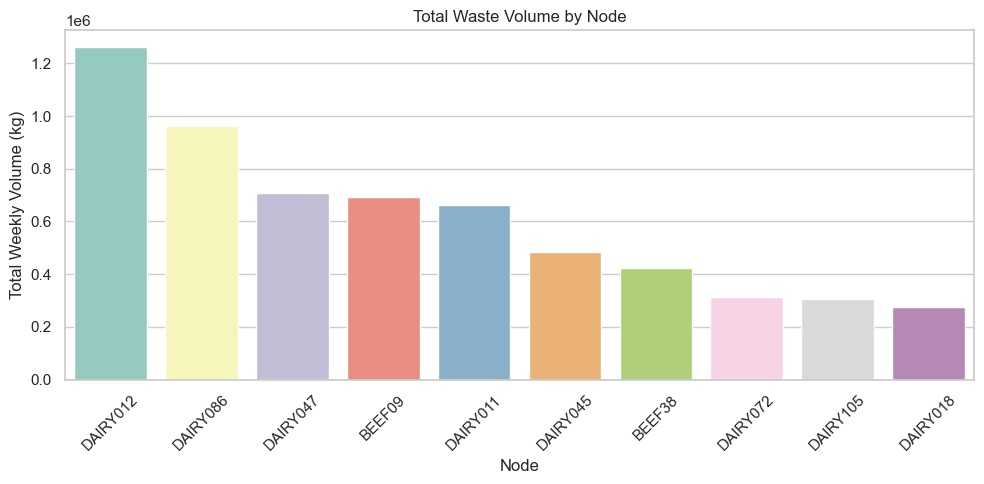

In [29]:
df['node'] = df['node'].astype(str).str.strip().str.upper()

node_summary = df.groupby("node")["amount (kg/week)"].sum().reset_index()
top_nodes = node_summary.sort_values(by="amount (kg/week)", ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_nodes, x="node", y="amount (kg/week)", palette="Set3")
plt.title("Total Waste Volume by Node")
plt.xlabel("Node")
plt.ylabel("Total Weekly Volume (kg)")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [30]:
df_cleaned = df[['node', 'product', 'amount (kg/week)']]
df_cleaned.to_csv('cleaned_livestock_waste_data.csv', index=False)

In [31]:
df_cleaned.head()

,node,product,amount (kg/week)
0,BEEF01,p1,16524.33044
1,BEEF02,p1,16524.33044
2,BEEF03,p1,16524.33044
3,BEEF04,p1,66097.32177
4,BEEF05,p1,33048.66088
